CH03_Q15

In [78]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [6]:
!pip install ISLP

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 162.5 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 323.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.8 MB 3.3 MB/s eta 0:00:05
   ---------------------------------------- 0.2/15.8 MB 2.4 MB/s eta 0:00:07
    --------------------------------------- 0.4/15.8 MB 2.8 MB/s eta 0:00:06
   - -------------------------------------- 0.5/15.8 MB 3.0 MB/s eta 0:00:06
   -- ------------------------------------- 0.9/15.8 MB 4.3 MB/s eta 0:00:04
   -- --

In [79]:
from ISLP import load_data
df = load_data('Boston')
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  


(a)  For each predictor, fit a simple linear regression model to predict 
the response.

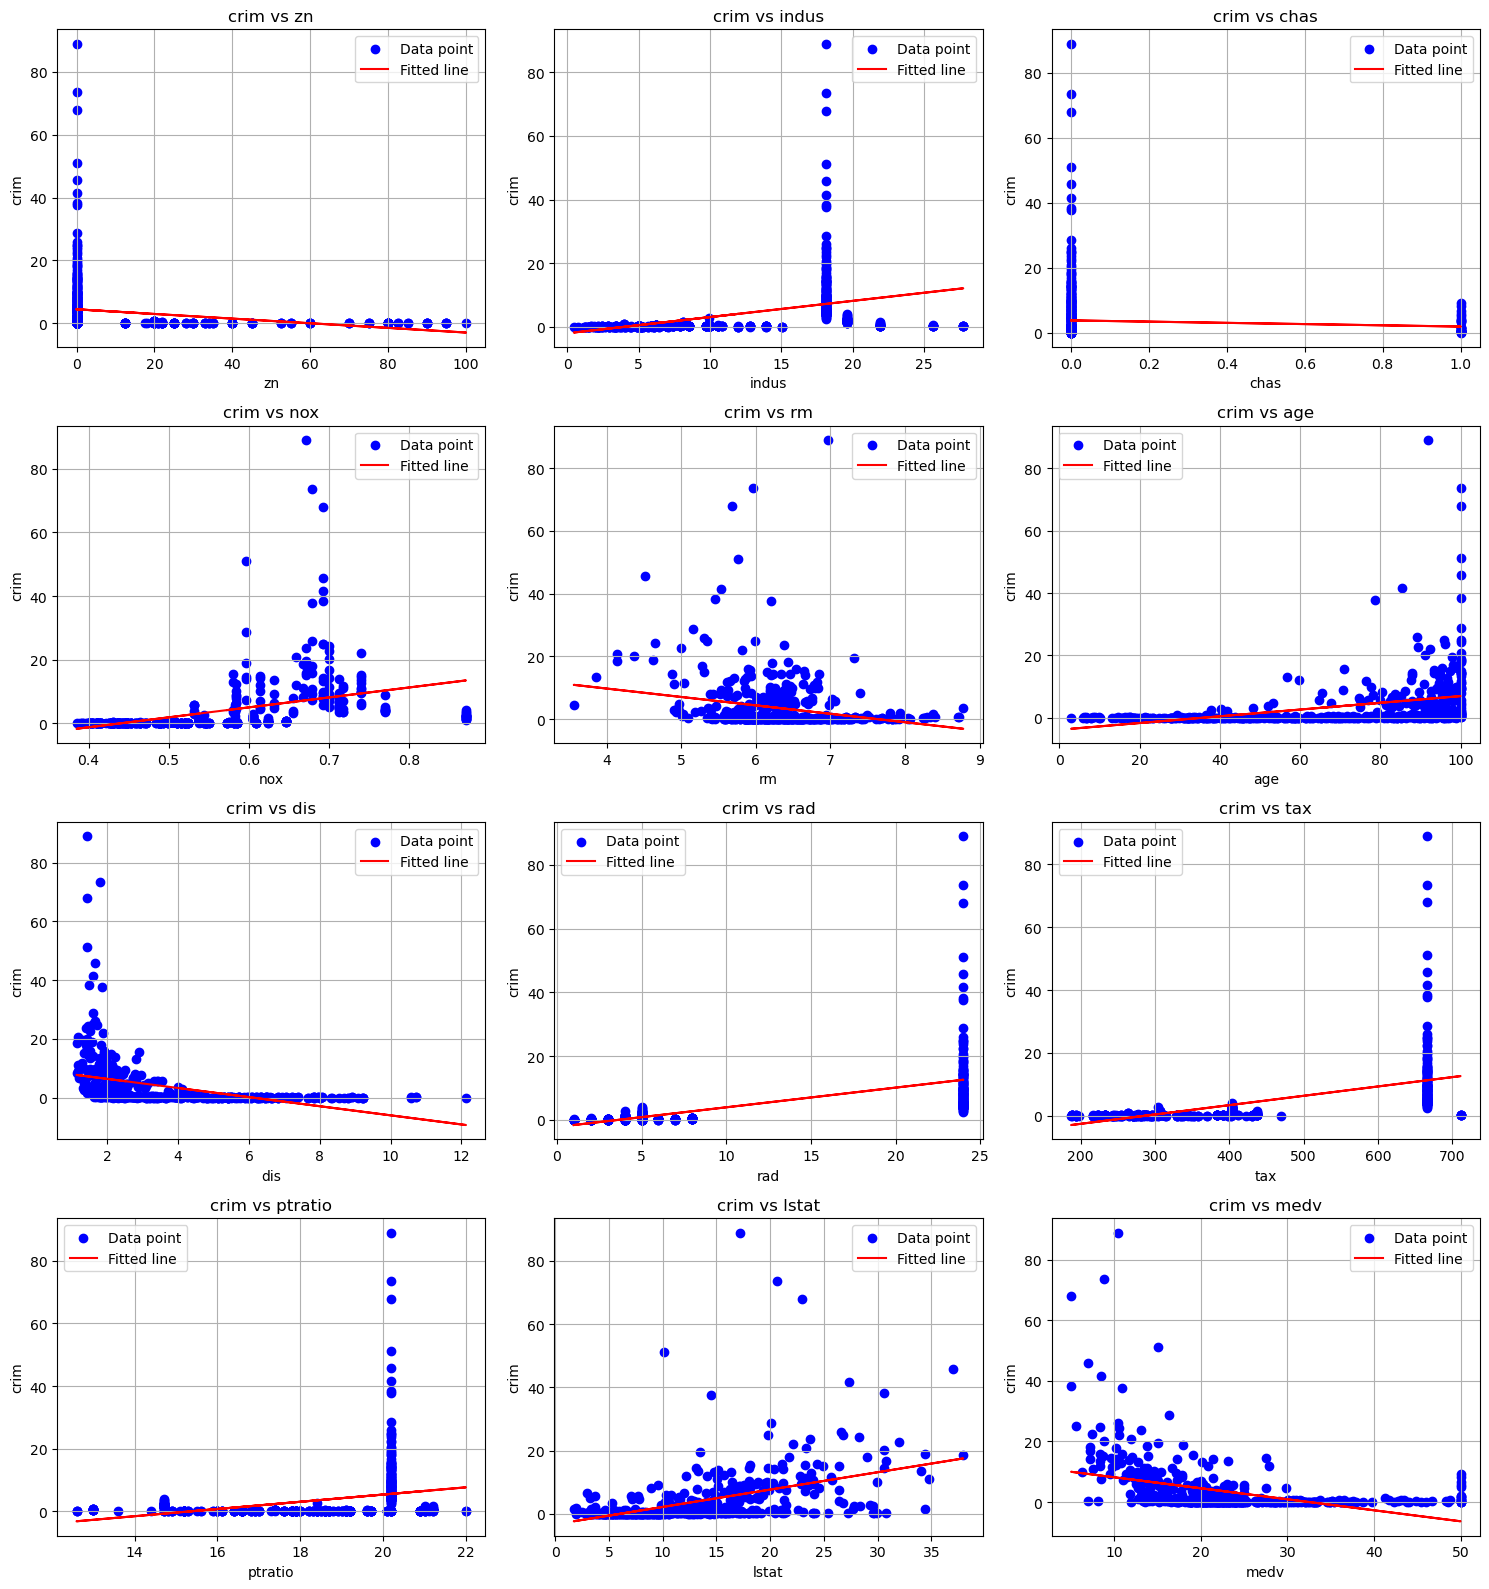

,Predictor,Simple Coefficient,Simple PValue
0,zn,-0.073935,5.506472e-06
1,indus,0.509776,1.450349e-21
2,chas,-1.892777,2.094345e-01
3,nox,31.248531,3.751739e-23
4,rm,-2.684051,6.346703e-07
5,age,0.107786,2.854869e-16
6,dis,-1.550902,8.519949e-19
7,rad,0.617911,2.693844e-56
8,tax,0.029742,2.357127e-47
9,ptratio,1.151983,2.942922e-11


In [76]:
results = []

# Set up the figure for simple linear regression plots
num_predictors = len(df.columns.drop('crim'))
n_cols = 3
n_rows = (num_predictors + n_cols - 1) // n_cols  # Calculate required rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Fit simple linear regression models for each predictor
for i, predictor in enumerate(predictors):
    X = sm.add_constant(df[[predictor]])  # Add constant for intercept
    y = df['crim']

    model = sm.OLS(y, X).fit()  
    p_value = model.pvalues.iloc[1]  
    coef = model.params.iloc[1]  

    results.append({'Predictor': predictor, 'Simple Coefficient': coef, 'Simple PValue': p_value})

    # Scatter plot and regression line
    axes[i].scatter(df[predictor], y, color='b', label='Data point')
    axes[i].plot(df[predictor], model.predict(X), color='r', label='Fitted line')
    axes[i].set_title(f"crim vs {predictor}")
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('crim')
    axes[i].grid(True)
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

(b) Fit a multiple regression model to predict the response using all of the predictors.

In [80]:
X_multi = sm.add_constant(df[predictors])  # Add all predictors with constant
y_multi = df['crim']
multi_model = sm.OLS(y_multi, X_multi).fit()  # Fit the multiple regression model

# Extract coefficients and p-values from multiple regression
multi_coefs = multi_model.params[1:]  # Exclude intercept
multi_pvalues = multi_model.pvalues[1:]  # Exclude intercept

# Add multiple regression results to the DataFrame
results_df['Multiple Coefficient'] = multi_coefs.values
results_df['Multiple P-Value'] = multi_pvalues.values

# Display the summary table
results_df

,Predictor,Simple Coefficient,Simple PValue,Multiple Coefficient,Multiple P-Value
0,zn,-0.073935,5.506472e-06,0.045710,1.534403e-02
1,indus,0.509776,1.450349e-21,-0.058350,4.857094e-01
2,chas,-1.892777,2.094345e-01,-0.825378,4.858406e-01
3,nox,31.248531,3.751739e-23,-9.957587,6.036986e-02
4,rm,-2.684051,6.346703e-07,0.628911,3.007385e-01
5,age,0.107786,2.854869e-16,-0.000848,9.623231e-01
6,dis,-1.550902,8.519949e-19,-1.012247,3.725942e-04
7,rad,0.617911,2.693844e-56,0.612465,8.588123e-12
8,tax,0.029742,2.357127e-47,-0.003776,4.657565e-01
9,ptratio,1.151983,2.942922e-11,-0.304073,1.033932e-01


(c) Create a plot displaying the univariate regression coefficients 
from (a) on the x-axis,<br>
 and the multiple regression coefficient 
from (b) on the y-axis.

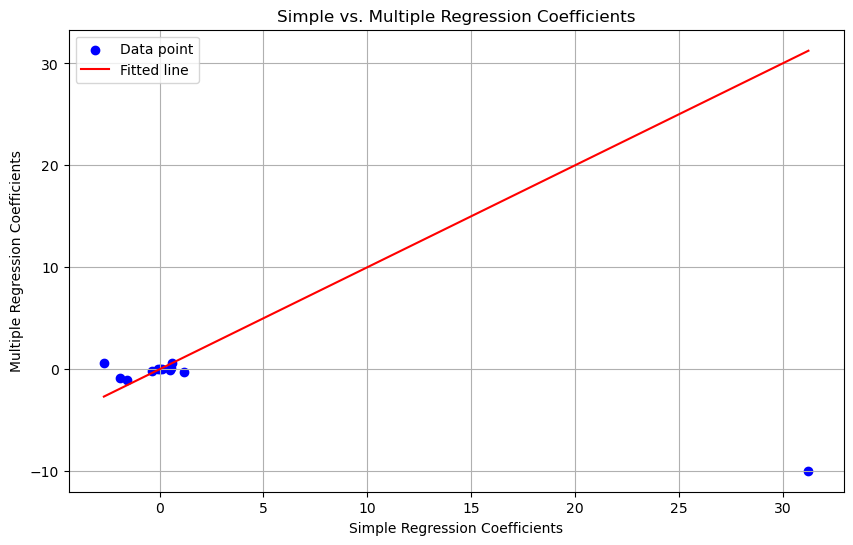

In [85]:
simple_coefs = results_df['Simple Coefficient']
multiple_coefs = results_df['Multiple Coefficient']

# Plot comparison
plt.figure(figsize=(10, 6))
plt.scatter(simple_coefs, multiple_coefs, color='b', label='Data point')
plt.plot([min(simple_coefs), max(simple_coefs)], [min(simple_coefs), max(simple_coefs)], color='red', label='Fitted line')
plt.xlabel("Simple Regression Coefficients")
plt.ylabel("Multiple Regression Coefficients")
plt.title("Simple vs. Multiple Regression Coefficients")
plt.grid(True)

plt.legend()
plt.show()


(d) Is there evidence of non-linear association between any of the predictors and the response?

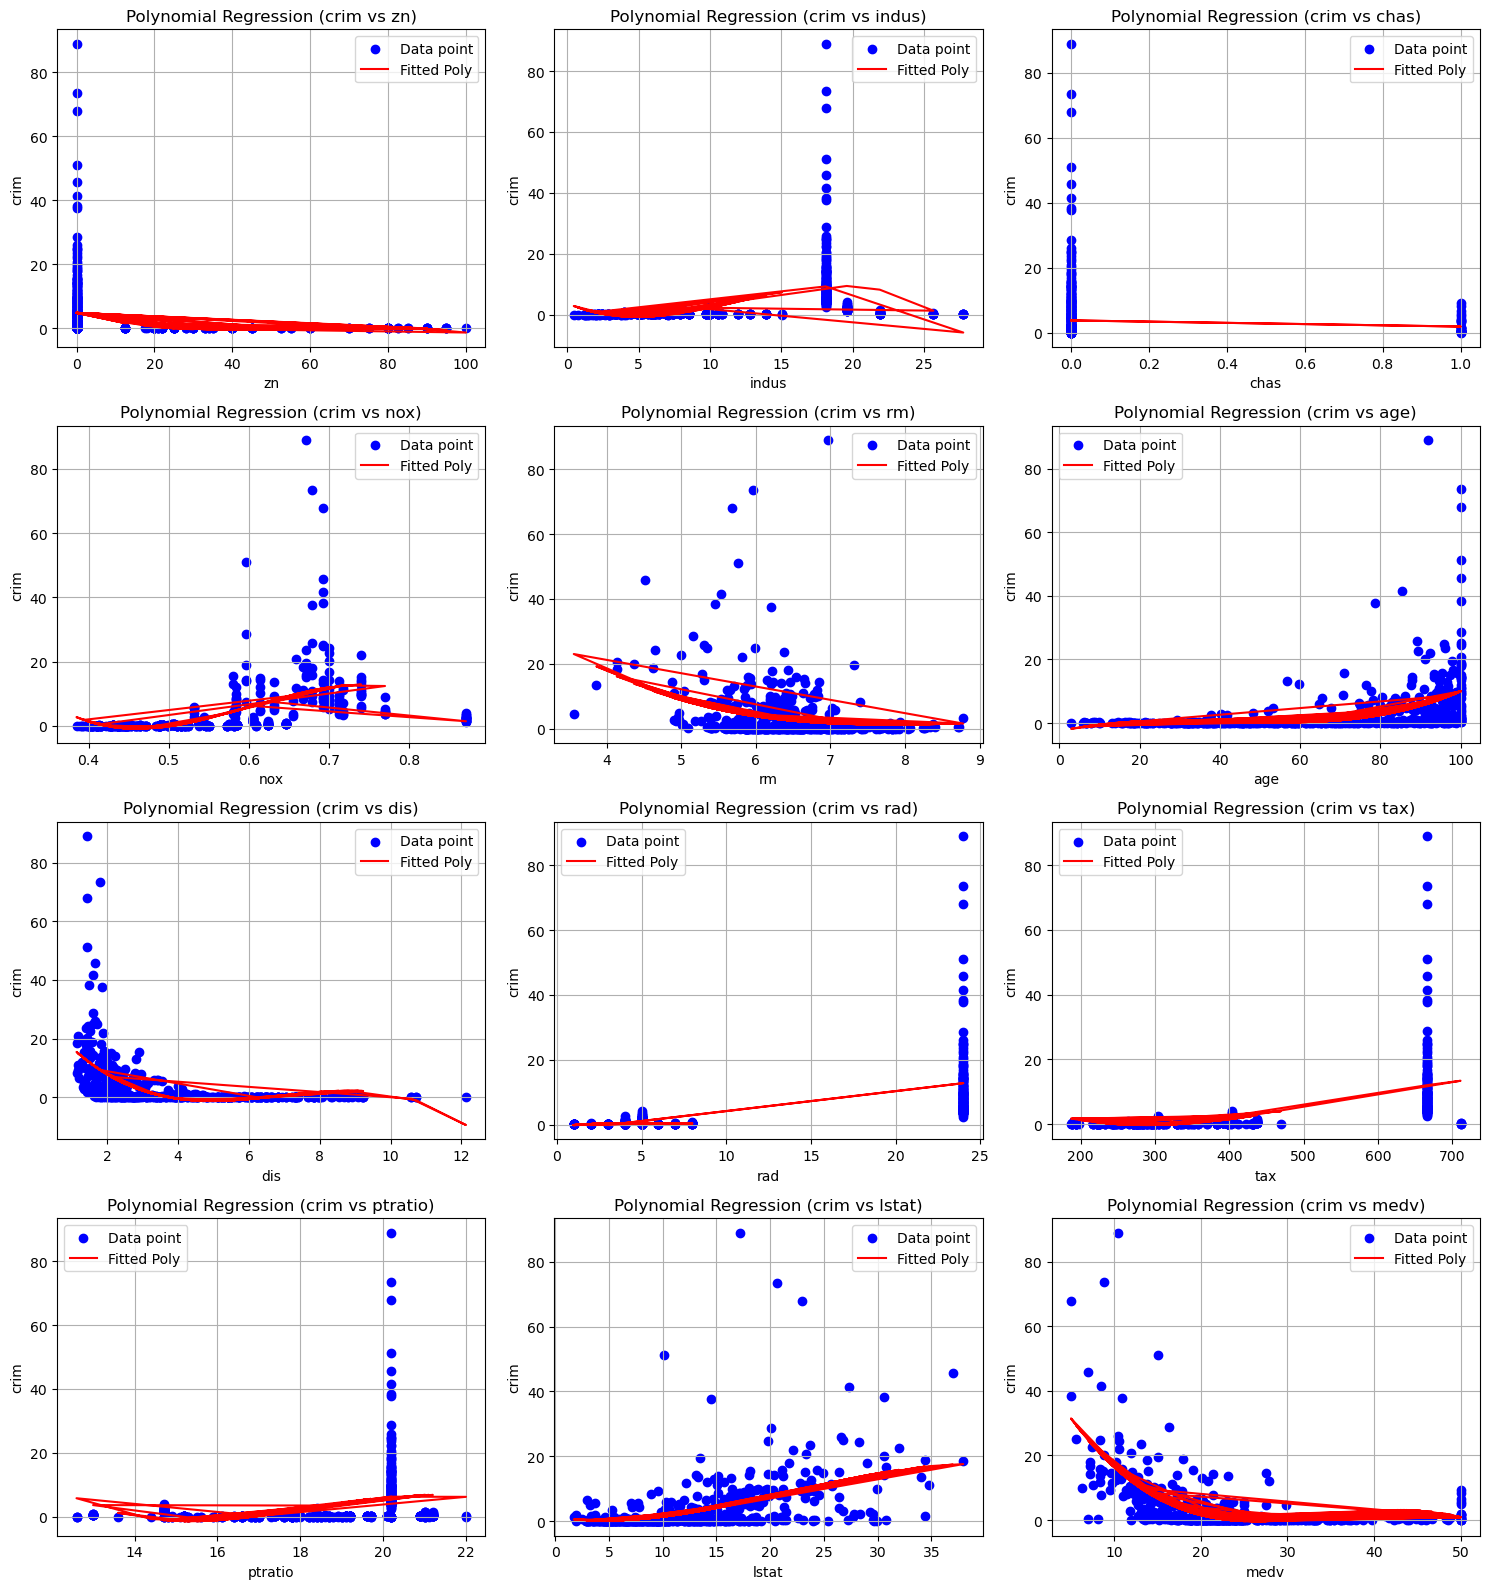

In [82]:
poly_results = []

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, predictor in enumerate(predictors):
    poly = PolynomialFeatures(degree=3)
    X_poly = poly.fit_transform(df[[predictor]])
    X_poly = sm.add_constant(X_poly)

    poly_model = sm.OLS(y, X_poly).fit()
    poly_results.append(poly_model.summary())

    # Displaying non-linear fit plots
    axes[i].scatter(df[predictor], y, color='b', label='Data point')
    axes[i].plot(df[predictor], poly_model.predict(X_poly), color='r', label='Fitted Poly')
    axes[i].set_title(f"Polynomial Regression (crim vs {predictor})")
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('crim')
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()